# Librerías

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

## Archivo: homicidios.xlsx

### Carga del Dataset

In [ ]:
# Cargar el dataset
homicidios = pd.read_excel('files/homicidios.xlsx', sheet_name=None)

# Mostrar los nombres de las hojas
print("Hojas en el archivo de homicidios:", homicidios.keys())


### Hoja: HECHOS

#### Dimensiones y Tipos de Datos

In [5]:
# Dimensiones y tipos de datos
homicidios_hechos = homicidios['HECHOS']
dimensiones_hechos = pd.DataFrame({
    'Filas': [homicidios_hechos.shape[0]],
    'Columnas': [homicidios_hechos.shape[1]]
})
tipos_hechos = pd.DataFrame(homicidios_hechos.dtypes, columns=['Tipo de Dato'])

display(dimensiones_hechos)
display(tipos_hechos)

,Filas,Columnas
0,696,21


,Tipo de Dato
ID,object
N_VICTIMAS,int64
FECHA,datetime64[ns]
AAAA,int64
MM,int64
DD,int64
HORA,object
HH,object
LUGAR_DEL_HECHO,object
TIPO_DE_CALLE,object


#### Valores Faltantes

In [7]:
# Valores faltantes
valores_faltantes_hechos = pd.DataFrame(homicidios_hechos.isnull().sum(), columns=['Valores Faltantes'])
valores_faltantes_hechos

,Valores Faltantes
ID,0
N_VICTIMAS,0
FECHA,0
AAAA,0
MM,0
DD,0
HORA,0
HH,0
LUGAR_DEL_HECHO,0
TIPO_DE_CALLE,0


Análisis de los valores faltantes: 

- Calle: Solo hay un valor faltante. Probablemente sea insignificante y no afecta el análisis general.

- Altura: Hay 567 valores faltantes, lo cual representa un 81% aproximandamente de todos los registros.

- Cruce: Hay 171 valores faltantes, lo cual indica que en el 30% de los casos, no se registró un cruce.

- Dirección Normalizada: Hay 8 valores faltantes, lo cual es relativamente bajo y podría ser manejable.

Acciones a tomar:



1. Calle: reemplazar el valor por 'desconocido'

In [8]:
# 1. Reemplazar valores faltantes en 'Calle'
homicidios_hechos['Calle'].fillna('Desconocido', inplace=True)


2. Altura: Analizar si tiene un patrón relacionado con el cruce.

3. Cruce: Analizar si  tiene un patrón relacionado con la altura.

In [9]:
# Análisis de patrones en los datos faltantes
faltantes_altura = homicidios_hechos[homicidios_hechos['Altura'].isnull()]
faltantes_cruce = homicidios_hechos[homicidios_hechos['Cruce'].isnull()]

# Verificar si los registros que tienen cruce no tienen altura y viceversa
altura_sin_cruce = faltantes_altura['Cruce'].notnull().sum()
cruce_sin_altura = faltantes_cruce['Altura'].notnull().sum()

# Guardar los resultados en un dataframe para documentar
patrones_faltantes = pd.DataFrame({
    'Altura sin Cruce': [altura_sin_cruce],
    'Cruce sin Altura': [cruce_sin_altura]
})
patrones_faltantes

,Altura sin Cruce,Cruce sin Altura
0,525,129


4. Dirección Normalizada: Ver específicamente esos valores y analizarlo

In [10]:
# Mostrar los registros donde falta la 'Dirección Normalizada'
registros_faltantes_direccion = homicidios_hechos[homicidios_hechos['Dirección Normalizada'].isnull()]

registros_faltantes_direccion

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,Point (. .),.,.,MOTO-SD,MOTO,SD
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,NaN,NaN,NaN,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,...,NaN,NaN,NaN,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),.,.,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
621,2021-0023,1,2021-03-01,2021,3,1,09:20:00,9,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS


Resultado del análisis:

- Altura: Se observa que, en la gran mayoría, los registros que tienen un Cruce no tienen Altura y viceversa. Esto tiene sentido ya que, en intersecciones, la altura puede no ser necesaria para identificar la ubicación del siniestro.

- Cruce: Los registros que no tienen Cruce suelen tener Altura, indicando que la ubicación fue registrada de otra manera.

- Dirección Normalizada: Hay 8 valores faltantes, los cuales 7 corresponden a autopistas, lo cual es lógico ya que estas ubicaciones pueden no tener una dirección normalizada.

In [11]:
# Reemplazar valores nulos en 'Altura' con 'Desconocido'
homicidios_hechos['Altura'].fillna('Desconocido', inplace=True)

# Reemplazar valores nulos en 'Cruce' con 'Desconocido'
homicidios_hechos['Cruce'].fillna('Desconocido', inplace=True)

# Verificar que se han reemplazado correctamente
print(homicidios_hechos[['Altura', 'Cruce']].isnull().sum())

Altura    0
Cruce     0
dtype: int64


#### Outliers

##### _Distribución de Siniestros por horas_

In [ ]:
# Convertir a formato datetime
homicidios_hechos['HORA'] = pd.to_datetime(homicidios_hechos['HORA'], format='%H:%M:%S', errors='coerce')

In [ ]:
# Extraer la hora como número entero
homicidios_hechos['HORA_NUM'] = homicidios_hechos['HORA'].dt.hour

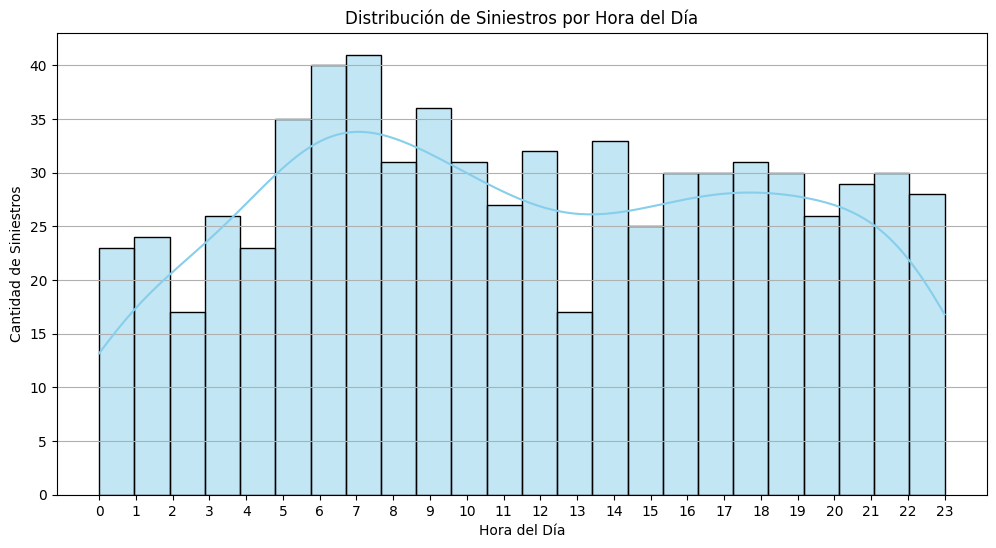

In [19]:
# Graficar el histograma de las horas
plt.figure(figsize=(12, 6))
sns.histplot(homicidios_hechos['HORA_NUM'].dropna(), bins=24, kde=True, color='skyblue')
plt.title('Distribución de Siniestros por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Siniestros')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()


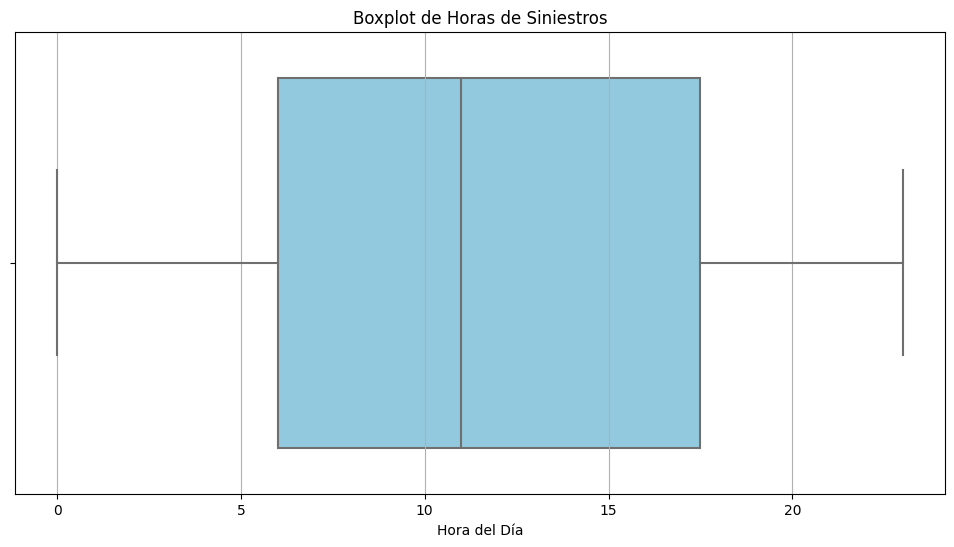

In [18]:
# Graficar un boxplot de las horas
plt.figure(figsize=(12, 6))
sns.boxplot(x=homicidios_hechos['HORA_NUM'], color='skyblue')
plt.title('Boxplot de Horas de Siniestros')
plt.xlabel('Hora del Día')
plt.grid(axis='x')
plt.show()


Conclusiones:

- Distribución Simétrica: La distribución de las horas de los siniestros parece bastante simétrica, con la mediana cerca del centro del rango intercuartílico.

- Rango Amplio de Siniestros: Los siniestros ocurren en un rango amplio de horas, desde la madrugada (alrededor de las 0:00) hasta la noche (cerca de las 23:00).

- Concentración de Siniestros: La mayor concentración de siniestros ocurre entre las 6:00 y las 18:00 horas, según el rango intercuartílico.

- Ausencia de Outliers: No hay outliers significativos en las horas de los siniestros, lo que sugiere que los datos de horas están bien distribuidos y no tienen valores extremadamente atípicos.


##### _Distribución por tipo de calle_

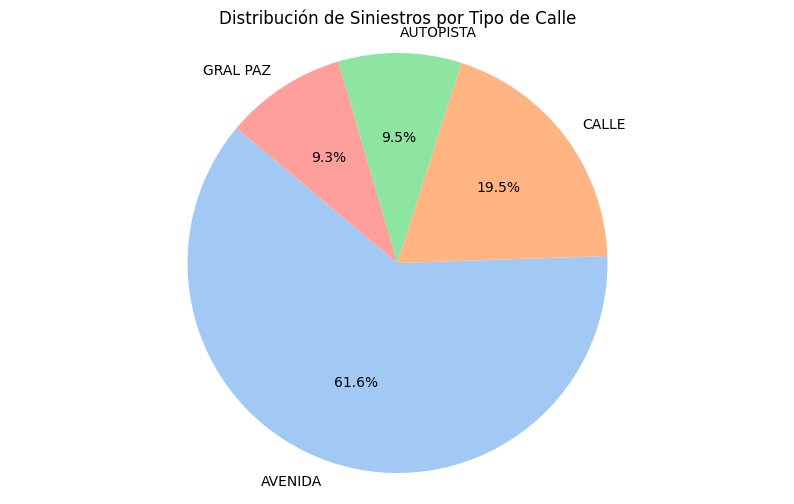

In [20]:
# Análisis de distribución por tipo de calle
distribucion_tipo_calle = homicidios_hechos['TIPO_DE_CALLE'].value_counts()

# Visualización de la distribución en un gráfico de torta
plt.figure(figsize=(10, 6))
plt.pie(distribucion_tipo_calle.values, labels=distribucion_tipo_calle.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribución de Siniestros por Tipo de Calle')
plt.axis('equal')
plt.show()


##### _Distribucón por Comuna_

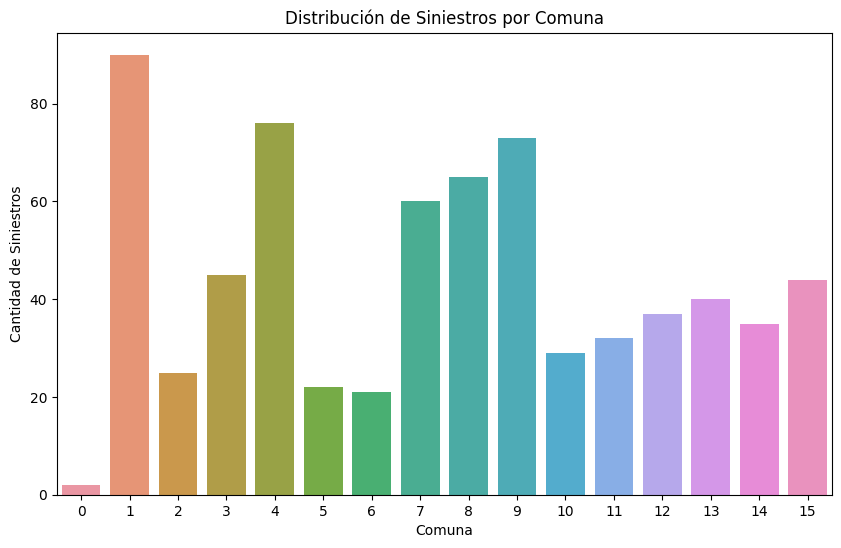

In [90]:
# Análisis de distribución por comuna
distribucion_comuna = homicidios_hechos['COMUNA'].value_counts()

# Visualización de la distribución
plt.figure(figsize=(10, 6))
sns.barplot(x=distribucion_comuna.index, y=distribucion_comuna.values)
plt.title('Distribución de Siniestros por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Siniestros')
plt.show()

##### _Distribución por vehículo involucrado_

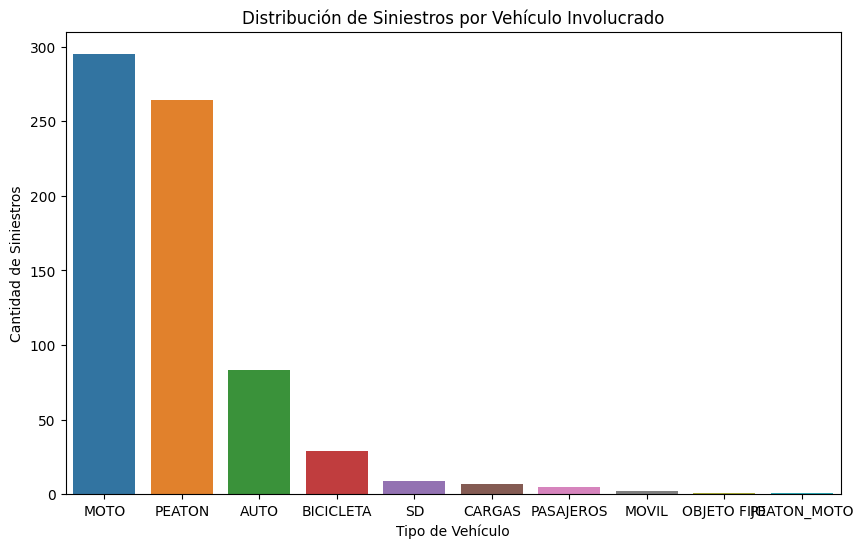

In [91]:
# Análisis de distribución por vehículo involucrado
distribucion_vehiculo = homicidios_hechos['VICTIMA'].value_counts()

# Visualización de la distribución
plt.figure(figsize=(10, 6))
sns.barplot(x=distribucion_vehiculo.index, y=distribucion_vehiculo.values)
plt.title('Distribución de Siniestros por Vehículo Involucrado')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Cantidad de Siniestros')
plt.show()


##### _Distribución por año_

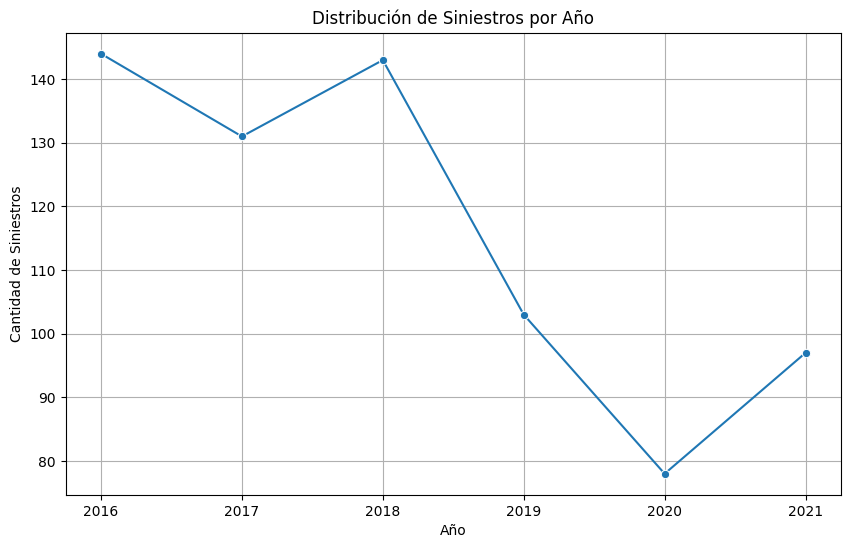

In [21]:
# Análisis de distribución por año
distribucion_anio = homicidios_hechos['AAAA'].value_counts().sort_index()

# Visualización de la distribución por año con gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(x=distribucion_anio.index, y=distribucion_anio.values, marker='o')
plt.title('Distribución de Siniestros por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Siniestros')
plt.grid(True)
plt.show()

##### Resumen de los Analisis Realizados

1. **Distribución de Siniestros por Hora**:
   - La mayoría de los siniestros se concentran entre las 6:00 y las 18:00 horas.
   - No se detectaron outliers significativos en los datos de horas, lo que sugiere una distribución bastante uniforme dentro de este rango.

2. **Distribución de Siniestros por Tipo de Calle**:
   - **Avenidas**: Representan el 61.6% de los siniestros, probablemente debido al mayor volumen de tráfico y velocidad.
   - **Calles**: Con el 19.5% de los siniestros, siguen siendo una zona crítica para la seguridad vial.
   - **Autopistas y General Paz**: Ambas tienen aproximadamente el 9.5% de los siniestros, siendo áreas de alta velocidad y potencialmente más peligrosas.

3. **Distribución de Siniestros por Comuna**:
   - Las comunas 1, 3, 4, 8 y 9 tienen la mayor cantidad de siniestros, con la Comuna 1 destacándose significativamente.
   - Las comunas 5 y 6 tienen una incidencia mucho menor de siniestros.

4. **Distribución de Siniestros por Vehículo Involucrado**:
   - **Motociclistas**: Son el grupo más afectado, seguido de los peatones.
   - **Peatones**: Tienen una alta incidencia, resaltando la necesidad de mejorar la infraestructura peatonal.
   - **Automóviles**: Aunque menos afectados que motociclistas y peatones, todavía representan una parte significativa de los siniestros.

5. **Distribución de Siniestros por Año**:
   - Se observa una tendencia a la disminución general de siniestros desde 2016 hasta 2020, con un aumento en 2021.
   - El año 2020 muestra una caída significativa, probablemente debido a la pandemia de COVID-19 y las restricciones de movilidad.

##### Relaciones Interesantes y Recomendaciones


1. **Avenidas y Siniestros**:
   - La alta incidencia de siniestros en avenidas sugiere la necesidad de implementar medidas de seguridad específicas para estas áreas, como el aumento de la señalización y el control de velocidad.

2. **Comunas Centrales y Tráfico**:
   - Las comunas centrales, como la Comuna 1, tienen una alta concentración de siniestros, posiblemente debido al alto tráfico y densidad de población. Mejorar la infraestructura vial y aumentar la presencia de agentes de tránsito en estas áreas podría reducir los siniestros.

3. **Motociclistas y Peatones**:
   - La alta incidencia de siniestros que involucran motociclistas y peatones subraya la necesidad de campañas de concientización y educación, así como mejoras en la infraestructura para estos usuarios de la vía.

4. **Impacto de la Pandemia en 2020**:
   - La disminución significativa de siniestros en 2020 debido a la pandemia muestra cómo la reducción del tráfico puede impactar positivamente la seguridad vial. Se podrían considerar políticas que promuevan la reducción del uso del automóvil en favor del transporte público y modos de transporte más seguros.

5. **Reactivación y Aumento de Siniestros en 2021**:
   - El aumento de siniestros en 2021 sugiere que la vuelta a la normalidad trae consigo un incremento en los riesgos viales. Es crucial monitorear esta tendencia y ajustar las políticas de seguridad vial para manejar el aumento de tráfico de manera segura.


#### Duplicados

In [23]:
# Detectar registros duplicados
duplicados = homicidios_hechos.duplicated()

# Contar la cantidad de registros duplicados
cantidad_duplicados = duplicados.sum()
print(f"Cantidad de registros duplicados: {cantidad_duplicados}")

# Mostrar los registros duplicados
registros_duplicados = homicidios_hechos[duplicados]
print("Registros duplicados:")
display(registros_duplicados)


Cantidad de registros duplicados: 0
Registros duplicados:


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


No hay registros duplicados.

### Hoja: VICTIMAS

#### Dimensiones y Tipos de Datos

In [24]:
# Dimensiones y tipos de datos
homicidios_victimas = homicidios['VICTIMAS']
dimensiones_victimas = pd.DataFrame({
    'Filas': [homicidios_victimas.shape[0]],
    'Columnas': [homicidios_victimas.shape[1]]
})
tipos_victimas = pd.DataFrame(homicidios_victimas.dtypes, columns=['Tipo de Dato'])

# Mostrar dimensiones y tipos de datos
display(dimensiones_victimas)
display(tipos_victimas)

,Filas,Columnas
0,717,10


,Tipo de Dato
ID_hecho,object
FECHA,datetime64[ns]
AAAA,int64
MM,int64
DD,int64
ROL,object
VICTIMA,object
SEXO,object
EDAD,object
FECHA_FALLECIMIENTO,object


#### Valores Faltantes

In [26]:
# Verificar valores faltantes en la hoja 'VICTIMAS'
valores_faltantes_victimas = pd.DataFrame(homicidios_victimas.isnull().sum(), columns=['Valores Faltantes'])
display(valores_faltantes_victimas)

,Valores Faltantes
ID_hecho,0
FECHA,0
AAAA,0
MM,0
DD,0
ROL,0
VICTIMA,0
SEXO,0
EDAD,0
FECHA_FALLECIMIENTO,0


No hay valores faltantes.

#### Duplicados

In [28]:
# Detectar registros duplicados
duplicados_victimas = homicidios_victimas.duplicated()

# Contar la cantidad de registros duplicados
cantidad_duplicados_victimas = duplicados_victimas.sum()
print(f"Cantidad de registros duplicados: {cantidad_duplicados_victimas}")

Cantidad de registros duplicados: 0


#### Outliers

Convertir la EDAD a tipo numérico

In [32]:
# Convertir la columna EDAD a numérico, forzando a NaN los valores no convertibles
homicidios_victimas['EDAD'] = pd.to_numeric(homicidios_victimas['EDAD'], errors='coerce')

print(homicidios_victimas['EDAD'].unique())

[19. 70. 30. 18. 29. 22. 16. 59. 65. 34. 41. 50. 38. 21. 52. 36. 20. 54.
 nan 56. 24. 78. 79. 26. 57. 37. 58. 23. 60. 42. 53. 51. 40. 87. 76. 75.
 35. 80. 43. 45. 67. 27. 55. 49. 81. 25. 33. 46. 83. 39. 28.  7. 48.  4.
 82. 32. 17. 47. 61. 10. 95. 73. 84. 66. 85.  1. 15. 13. 77. 44. 31. 62.
 74. 71. 11. 86. 69. 72. 12. 63. 92. 68. 91. 64.  5. 88.]


Visualización de posibles outliers

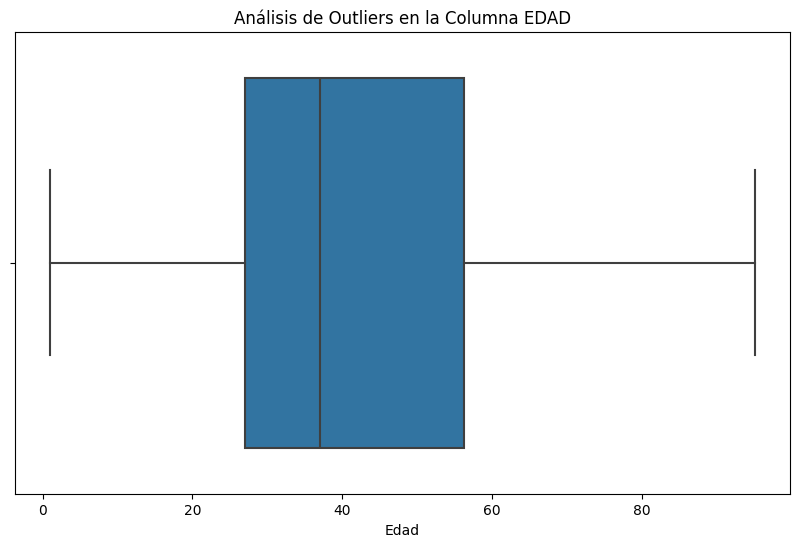

In [33]:
# Visualización de outliers en la columna EDAD con boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=homicidios_victimas['EDAD'])
plt.title('Análisis de Outliers en la Columna EDAD')
plt.xlabel('Edad')
plt.show()


El gráfico de boxplot muestra que la distribución de las edades de las víctimas es bastante uniforme, sin valores extremadamente atípicos. Esto sugiere que las edades reportadas son coherentes y no hay edades inusualmente bajas o altas que necesiten ser investigadas o corregidas.

#### Distribuciones

##### _Frecuencia de EDAD_

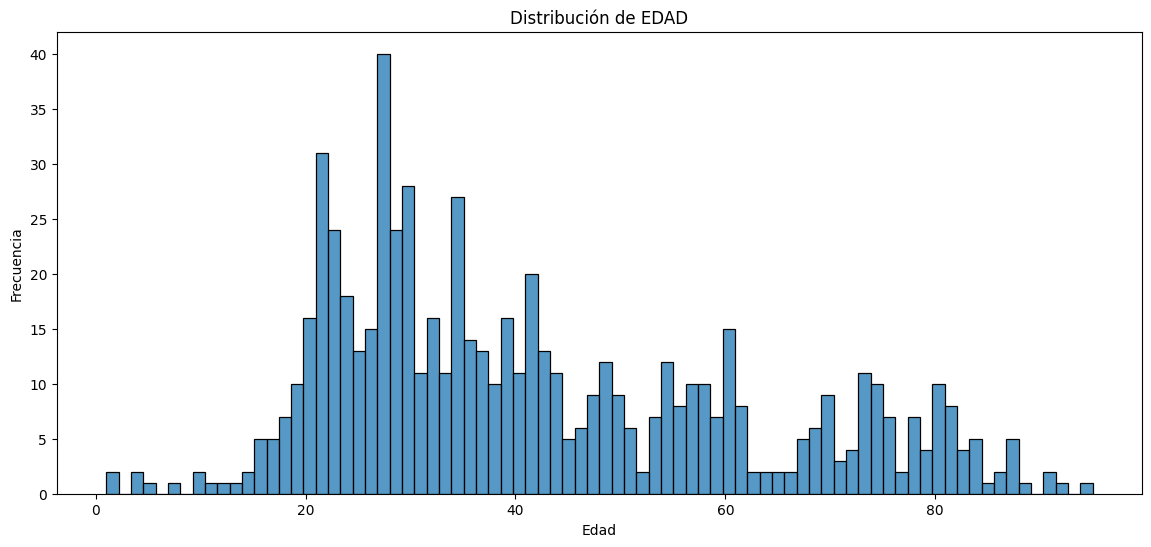

In [62]:
# Gráfico de Frecuencia para EDAD
plt.figure(figsize=(14, 6))
sns.histplot(homicidios_victimas['EDAD'].dropna(), bins=80, kde=False)
plt.title('Distribución de EDAD')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

##### _Sexo de las victimas_

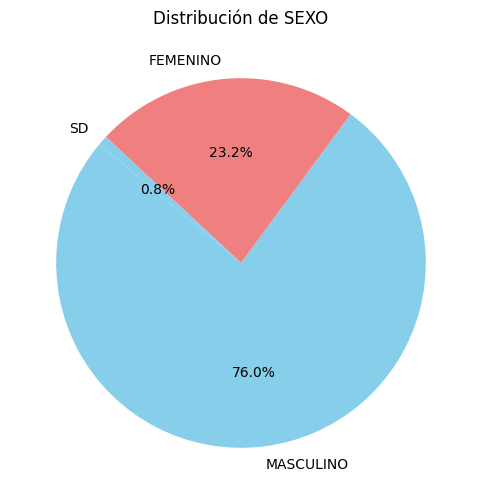

In [60]:
# Gráfico de Torta para SEXO
plt.figure(figsize=(10, 6))
homicidios_victimas['SEXO'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribución de SEXO')
plt.ylabel('')  # Ocultar el label de y
plt.show()

##### _Relación entre la EDAD y VICTIMA_

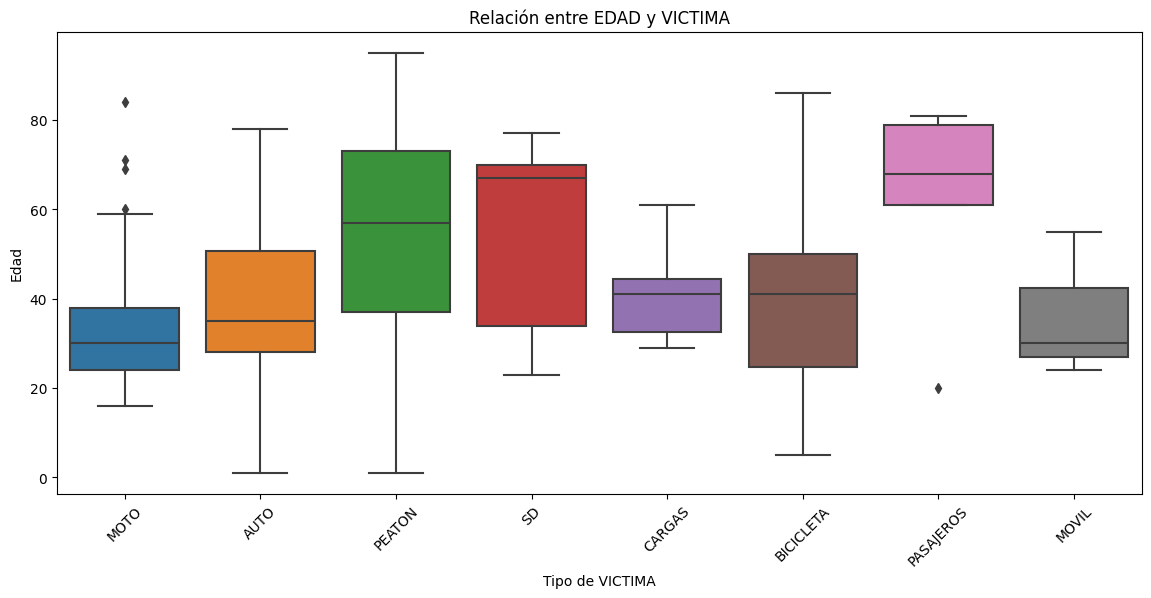

In [63]:
# Gráfico de Caja para la Relación entre EDAD y VICTIMA
plt.figure(figsize=(14, 6))
sns.boxplot(x='VICTIMA', y='EDAD', data=homicidios_victimas)
plt.title('Relación entre EDAD y VICTIMA')
plt.xlabel('Tipo de VICTIMA')
plt.ylabel('Edad')
plt.xticks(rotation=45)
plt.show()


#### Resumen de los Analisis Realizados

**Conclusiones:**

1. Edad:

    - Los jóvenes de 20-25 años y las personas mayores de alrededor de 60 años son los grupos más vulnerables.

2. Sexo:

    - Los hombres son significativamente más propensos a ser víctimas en siniestros viales.
    
3. Relación EDAD-VICTIMA

    - Motociclistas: Los jóvenes son los más afectados. Esto sugiere la necesidad de campañas de concientización y educación vial dirigidas a motociclistas jóvenes.

    - Peatones y Pasajeros: Las personas mayores son más vulnerables. Es crucial mejorar la infraestructura peatonal y la seguridad vehicular para proteger a los ancianos.

    - Ciclistas: La amplia variabilidad en las edades indica la necesidad de medidas inclusivas para la seguridad de los ciclistas.

    - General: La variabilidad en las edades de las víctimas en diferentes tipos de vehículos resalta la importancia de adaptar las medidas de seguridad a las características específicas de cada grupo.

### Merge de HECHOS y VICTIMAS

#### Info general de los datasets

In [64]:
homicidios_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [68]:
homicidios_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 664 non-null    float64       
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 56.1+ KB


#### Merge

In [72]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [ ]:
# Realizar el merge de los datasets
merged_data = pd.merge(homicidios_hechos, homicidios_victimas, left_on='ID', right_on='ID_hecho', suffixes=('_hechos', '_victimas'))

# Mostrar las primeras filas
merged_data.head()

#### Transformaciones post merge

In [75]:
# Eliminar columnas duplicadas o irrelevantes
columns_to_drop = ['ID_hecho', 'FECHA_victimas', 'AAAA_victimas', 'MM_victimas', 'DD_victimas', 'VICTIMA_hechos']
merged_data_clean = merged_data.drop(columns=columns_to_drop)

# Renombrar columnas para mayor claridad
merged_data_clean = merged_data_clean.rename(columns={
    'FECHA_hechos': 'FECHA',
    'AAAA_hechos': 'AAAA',
    'MM_hechos': 'MM',
    'DD_hechos': 'DD',
})

# Mostrar las primeras filas del dataframe resultante
merged_data_clean.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,ACUSADO,ROL,VICTIMA_victimas,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,19.0,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,PASAJEROS,CONDUCTOR,AUTO,MASCULINO,70.0,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,30.0,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,SD,CONDUCTOR,MOTO,MASCULINO,18.0,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,PASAJEROS,CONDUCTOR,MOTO,MASCULINO,29.0,2016-02-01 00:00:00


In [78]:
merged_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     717 non-null    object        
 1   N_VICTIMAS             717 non-null    int64         
 2   FECHA                  717 non-null    datetime64[ns]
 3   AAAA                   717 non-null    int64         
 4   MM                     717 non-null    int64         
 5   DD                     717 non-null    int64         
 6   HORA                   717 non-null    object        
 7   HH                     717 non-null    object        
 8   LUGAR_DEL_HECHO        717 non-null    object        
 9   TIPO_DE_CALLE          717 non-null    object        
 10  Calle                  716 non-null    object        
 11  Altura                 133 non-null    float64       
 12  Cruce                  540 non-null    object        
 13  Direc

In [ ]:
import pandas as pd

# Reemplazar valores no válidos en la columna 'HORA' con NaT
merged_data_clean['HORA'] = pd.to_datetime(merged_data_clean['HORA'], format='%H:%M:%S', errors='coerce')

# Convertir la columna 'HORA' a tipo int (hora del día), dejando NaT para valores no válidos
merged_data_clean['HORA'] = merged_data_clean['HORA'].dt.hour

# Convertir la columna 'FECHA_FALLECIMIENTO' a tipo datetime
merged_data_clean['FECHA_FALLECIMIENTO'] = pd.to_datetime(merged_data_clean['FECHA_FALLECIMIENTO'], errors='coerce')

# Rellenar valores faltantes en la columna 'Altura' con un marcador específico (por ejemplo, -1)
merged_data_clean['Altura'] = merged_data_clean['Altura'].fillna(-1)

# Rellenar valores faltantes en la columna 'Calle' con 'No Especificado'
merged_data_clean['Calle'] = merged_data_clean['Calle'].fillna('No Especificado')

# Rellenar valores faltantes en la columna 'Cruce' con 'No Especificado'
merged_data_clean['Cruce'] = merged_data_clean['Cruce'].fillna('No Especificado')

# Rellenar valores faltantes en la columna 'Dirección Normalizada' con 'No Especificado'
merged_data_clean['Dirección Normalizada'] = merged_data_clean['Dirección Normalizada'].fillna('No Especificado')

# Rellenar valores faltantes en la columna 'EDAD' con la media o un marcador específico (por ejemplo, -1)
merged_data_clean['EDAD'] = merged_data_clean['EDAD'].fillna(-1)

In [81]:
# Verificar el dataframe limpio
merged_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     717 non-null    object        
 1   N_VICTIMAS             717 non-null    int64         
 2   FECHA                  717 non-null    datetime64[ns]
 3   AAAA                   717 non-null    int64         
 4   MM                     717 non-null    int64         
 5   DD                     717 non-null    int64         
 6   HORA                   716 non-null    float64       
 7   HH                     717 non-null    object        
 8   LUGAR_DEL_HECHO        717 non-null    object        
 9   TIPO_DE_CALLE          717 non-null    object        
 10  Calle                  717 non-null    object        
 11  Altura                 717 non-null    float64       
 12  Cruce                  717 non-null    object        
 13  Direc

#### Exportar CSV

In [87]:
# Exportar a CSV
merged_data_clean.to_csv('export/merged_homicidios_data.csv', index=False)